iter:50 training loss: 0.060749351978302, val loss: 0.060749351978302
iter:100 training loss: 0.05887715891003609, val loss: 0.05887715891003609
iter:150 training loss: 0.0588272400200367, val loss: 0.0588272400200367
iter:200 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:250 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:300 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:350 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:400 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:450 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:500 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:550 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:600 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:650 training loss: 0.0588272325694561, val loss: 0.0588272325694561
iter:700 training loss: 0.0588272325694561, val loss

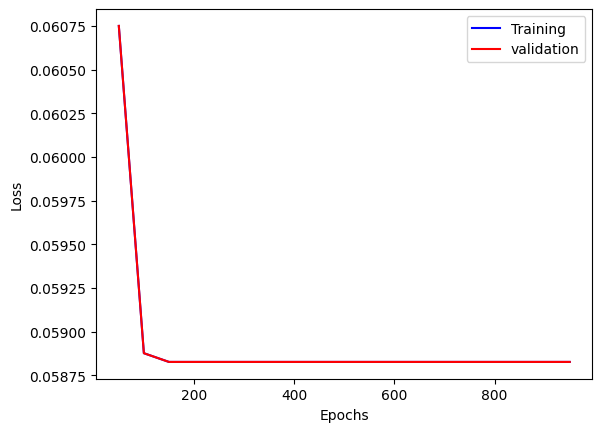

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import time
import numpy as np
import plotly.express as px


activation_count = 5
feature_count =10
learning_rate = 0.01
max_iters = 1000
sparse_penalty_coefficient = 0.01


class SparseAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(activation_count, feature_count)
        self.relu = nn.ReLU()
        self.decoder = nn.Linear(feature_count, activation_count)
    

    def forward(self, input, targets = None):
        logits = self.encoder(input)
        logits = self.relu(logits)
        sparse_penalty = sparse_penalty_coefficient*torch.norm(logits, p =1)
        logits = self.decoder(logits)
        
        
        loss = ((logits-targets)**2).mean() + sparse_penalty

        return logits, loss

iters = []
loss_value = []
val_loss_value = []


acts = torch.load("activations_8192*5.pt")




model = SparseAutoEncoder()

optimizer = torch.optim.Adam(model.parameters() , learning_rate)
start_time = time.time()
step_value = max_iters/20
for i in range(1, max_iters):
    logits, loss = model(acts, acts)

    if i%step_value ==0 :
        model.eval()
        with torch.no_grad():
            _, val_loss = model(acts, acts)
            iters.append(i)
            loss_value.append(loss.item())
            val_loss_value.append(val_loss.item())
            print(f"iter:{i} training loss: {loss.item()}, val loss: {val_loss.item()}")
        model.train()

    optimizer.zero_grad(set_to_none=True)
    #loss+= get_l1_penalty()
    loss.backward()
    optimizer.step()


end_time = time.time()
print(f"Took {end_time-start_time}s for {max_iters} epochs")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(iters,loss_value, color='blue', label="Training")
plt.plot(iters, val_loss_value, "red", label = "validation")
plt.legend()
plt.show()

        